In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
def add_path(p):
    if p not in sys.path:
        sys.path.append(p)
add_path(f'{os.getcwd()}/../src')
from input_output import read_out

<Axes: title={'center': 'Temporal pattern=ARR2016 pattern, 27 (point temporal patterns) \n Duration=9 hour \n reduction factor=1.00 (ARR2016 approach)'}, xlabel='Time'>

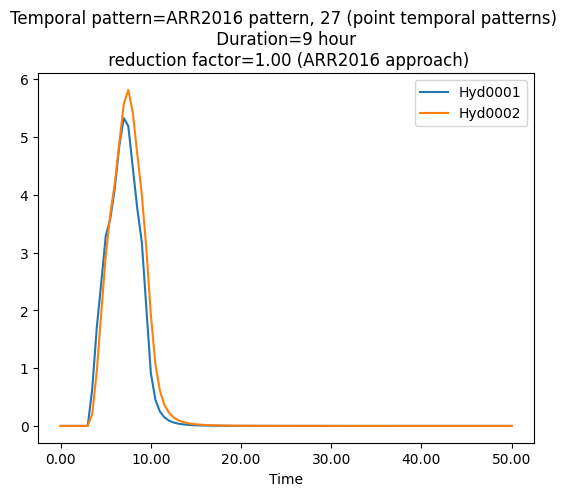

In [331]:
from pathlib import Path
bp = Path('/media/ashkan/OS/ubuntu/sana_rorb/Oct23/RORB/Output/test1_ensemble')
file_path = list(bp.glob('*.out'))[2]
secionts = read_out.read_sections(file_path)
hg = read_out.read_hydrographs(secionts)
metadata = read_out.extract_metadata(file_path)
hg.plot(title='Temporal pattern={Temporal pattern} \n Duration={Storm duration} \n reduction factor={Areal Red Fact}'.format(**metadata))

In [332]:

bp = Path('/media/ashkan/OS/ubuntu/sana_rorb/Oct23/RORB/Output/test1_ensemble')
import pandas as pd
import numpy as np

df_metadata=None
for file_path in list(bp.glob('*.out')):
    secionts = read_out.read_sections(file_path)
    hg = read_out.read_hydrographs(secionts)
    metadata = read_out.extract_metadata(file_path)
    
    if df_metadata is None:
        df_metadata = pd.DataFrame(columns=list(metadata.keys()), dtype=str)
        df_peaks= pd.DataFrame(columns=hg.columns, dtype=float)
        
    df_metadata.loc[file_path.stem, list(metadata.keys())] = list(metadata.values())
    df_peaks.loc[file_path.stem] = np.max(hg)
    
    

df = pd.concat([df_metadata, df_peaks], axis=1)

In [345]:
df_table = df.pivot_table(values='Hyd0001', index=['Temporal pattern'], columns = ['Storm duration'])
df_table.index = [x[16:19] for x in df_table.index]

Storm duration,1 hour,1.5 hour,10 min,12 hour,120 hour,144 hour,15 min,168 hour,18 hour,2 hour,...,30 hour,30 min,36 hour,4.5 hour,45 min,48 hour,6 hour,72 hour,9 hour,96 hour
21,8.1723,9.1828,0.9065,5.5495,2.1264,1.8097,1.6186,3.7615,3.1372,6.8703,...,3.2204,6.5502,3.8181,8.1781,7.9684,7.2871,11.9089,3.2041,7.5998,2.7924
22,8.7087,10.1102,0.9065,6.6437,2.2799,2.5287,1.6186,1.5471,7.4597,6.4700,...,4.3791,6.2552,4.9077,13.3067,7.9699,4.2772,10.3286,3.5187,5.9192,2.6118
23,9.2924,12.2091,0.9065,11.4241,3.7924,3.4883,1.6186,1.1381,9.0651,8.8163,...,4.5554,7.1375,4.8857,13.5678,8.0446,3.4979,12.2504,2.1110,11.0619,3.3840
24,8.3241,7.3440,0.9065,6.8424,1.3770,1.4451,1.6186,4.1930,5.6601,8.4743,...,5.0300,6.4573,3.4195,7.1015,6.9334,1.2554,8.7042,1.2405,8.4474,1.9193
25,9.6199,7.8530,0.9065,8.3762,3.5309,1.5708,1.6186,0.4900,5.3895,9.9055,...,3.4073,6.0775,3.2038,10.2949,8.7463,4.1789,6.4673,2.4492,5.6010,1.2897
26,10.3931,8.0810,0.9065,7.4815,3.5679,4.0018,1.6186,5.0784,3.8968,9.7731,...,1.9540,6.3791,1.6436,7.4717,8.9258,2.6886,13.7723,1.9851,5.4837,4.5400
27,12.3540,10.9369,0.9065,7.7946,1.3310,0.9780,1.6186,2.8652,5.6479,8.9961,...,2.7925,6.3679,4.8933,6.3497,8.3213,3.4537,8.5700,3.7883,5.8127,4.0680
28,8.1335,9.3337,0.9065,6.5505,1.5151,4.1297,1.6186,2.0801,4.2408,12.8323,...,5.9262,6.0666,6.3649,8.0113,8.3403,3.2176,5.9839,1.2513,6.7197,1.4022
29,11.1703,13.3399,0.9065,7.4851,3.8631,3.0072,1.6186,3.8240,4.0154,15.2691,...,3.6306,7.1730,3.4396,7.3822,9.7169,5.8638,8.8913,1.0475,6.7574,5.6098
30,10.8959,12.1292,0.9065,4.4446,2.7582,0.9279,1.6186,2.5427,5.9928,15.0908,...,4.5189,7.2369,3.7395,13.8594,10.7743,4.2772,13.1265,3.0473,6.3470,2.9138


In [346]:
read_out.find_median_one_ups(df_table).sort_values('peak', ascending=False)

6.0


,pattern,peak
6 hour,22,10.3286
1.5 hour,22,10.1102
3 hour,25,10.0233
2 hour,26,9.7731
1 hour,25,9.6199
45 min,28,8.3403
4.5 hour,21,8.1781
12 hour,26,7.4815
9 hour,28,6.7197
30 min,24,6.4573


/tmp/ipykernel_1294730/509920142.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax= plt.subplots(figsize=(5,2))


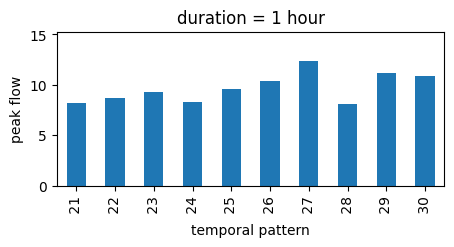

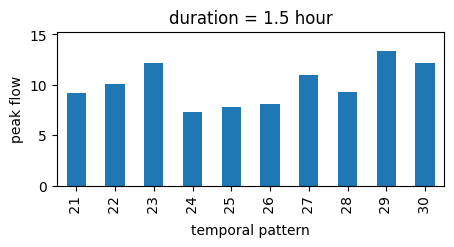

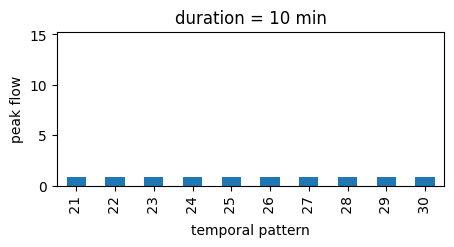

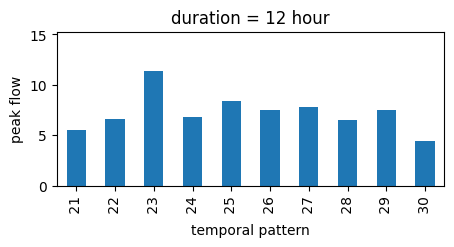

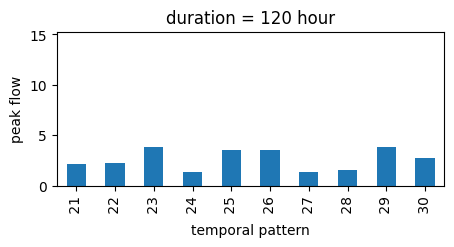

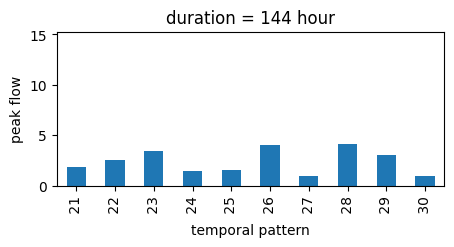

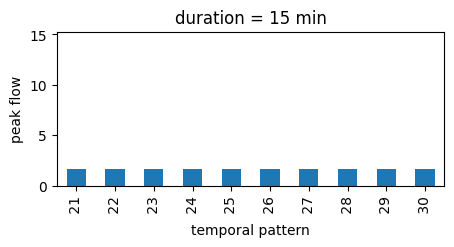

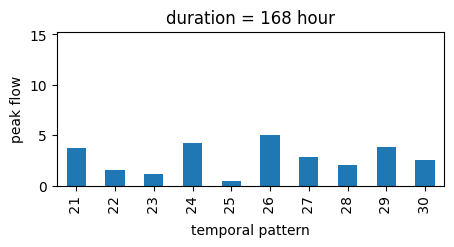

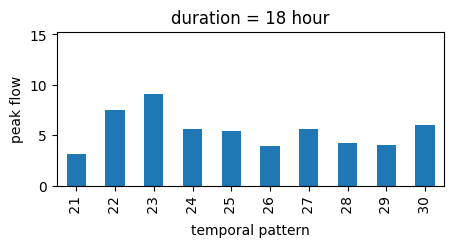

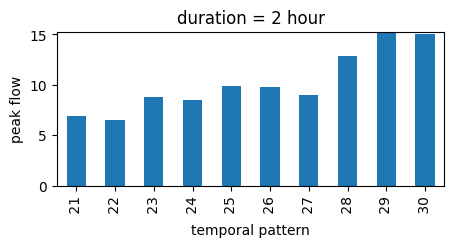

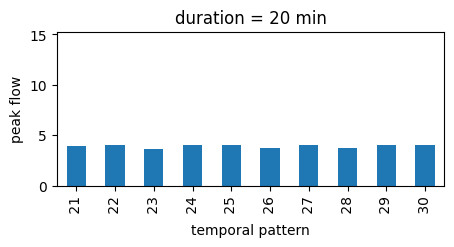

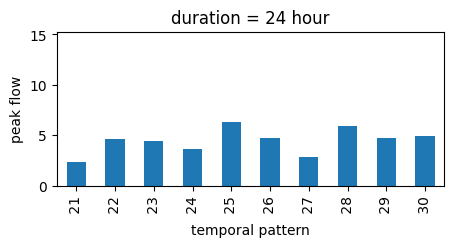

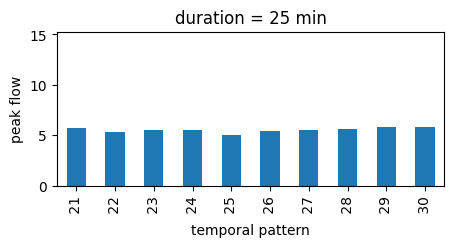

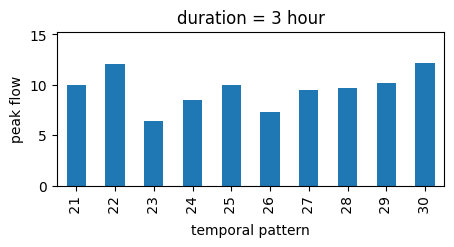

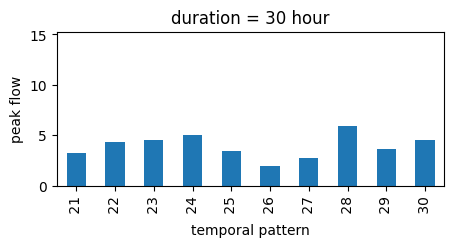

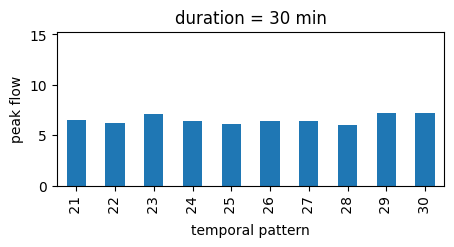

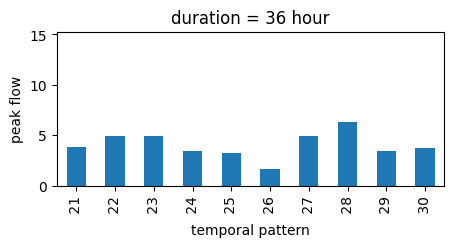

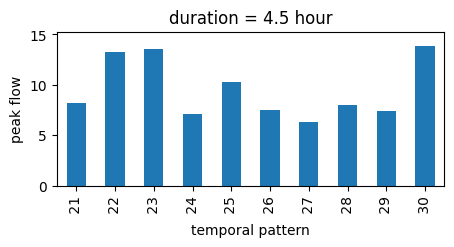

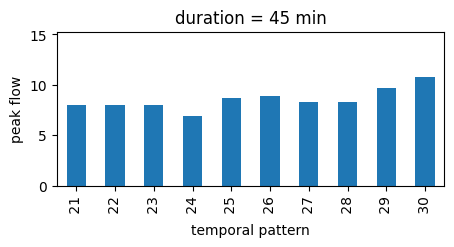

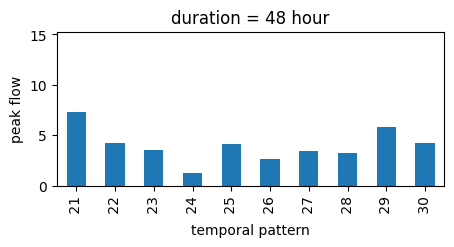

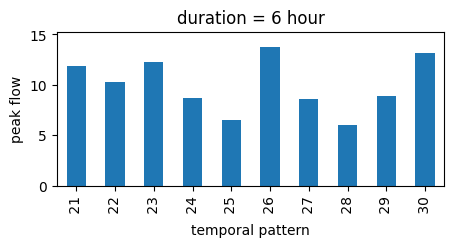

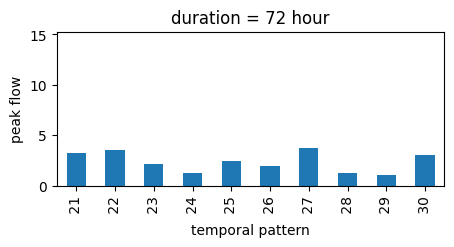

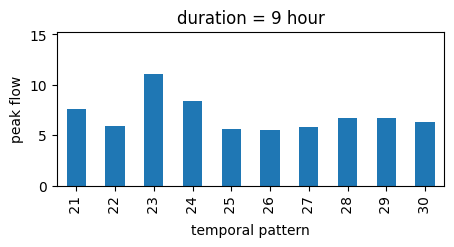

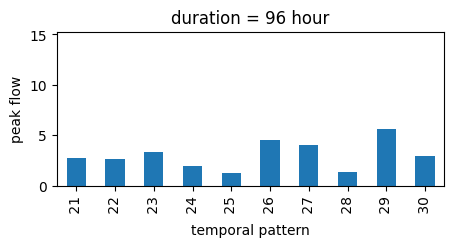

In [354]:
from matplotlib import pyplot as plt
max_flow = df_table.max().max()
for column in df_table:
    fig, ax= plt.subplots(figsize=(5,2))
    df_table[column].plot.bar(ax=ax)
    plt.ylabel('peak flow')
    plt.xlabel('temporal pattern')
    plt.title(f'duration = {column}')
    plt.ylim([0, max_flow])

In [276]:
median_one_up = np.floor(df_table.shape[0])+1
result_df = pd.DataFrame()
for column in df_table:
    true_rows = df_table[column].index[df_table[column].rank(method='first')==6]
    # Add the column name and true rows to the result DataFrame
    result_df[column] = true_rows


,0
"(1 hour, 1%)","ARR2016 pattern, 25 (point temporal patterns)"
"(1.5 hour, 1%)","ARR2016 pattern, 22 (point temporal patterns)"
"(10 min, 1%)","ARR2016 pattern, 26 (point temporal patterns)"
"(12 hour, 1%)","ARR2016 pattern, 26 (point temporal patterns)"
"(120 hour, 1%)","ARR2016 pattern, 30 (point temporal patterns)"
"(144 hour, 1%)","ARR2016 pattern, 22 (point temporal patterns)"
"(15 min, 1%)","ARR2016 pattern, 26 (point temporal patterns)"
"(168 hour, 1%)","ARR2016 pattern, 27 (point temporal patterns)"
"(18 hour, 1%)","ARR2016 pattern, 27 (point temporal patterns)"
"(2 hour, 1%)","ARR2016 pattern, 26 (point temporal patterns)"


In [273]:
df_table[column].rank()

Temporal pattern
ARR2016 pattern, 21 (point temporal patterns)    5.5
ARR2016 pattern, 22 (point temporal patterns)    5.5
ARR2016 pattern, 23 (point temporal patterns)    5.5
ARR2016 pattern, 24 (point temporal patterns)    5.5
ARR2016 pattern, 25 (point temporal patterns)    5.5
ARR2016 pattern, 26 (point temporal patterns)    5.5
ARR2016 pattern, 27 (point temporal patterns)    5.5
ARR2016 pattern, 28 (point temporal patterns)    5.5
ARR2016 pattern, 29 (point temporal patterns)    5.5
ARR2016 pattern, 30 (point temporal patterns)    5.5
Name: (10 min, 1%), dtype: float64

In [260]:
for c in df_table:
    print(df_table[c])

Temporal pattern
ARR2016 pattern, 21 (point temporal patterns)     8.1723
ARR2016 pattern, 22 (point temporal patterns)     8.7087
ARR2016 pattern, 23 (point temporal patterns)     9.2924
ARR2016 pattern, 24 (point temporal patterns)     8.3241
ARR2016 pattern, 25 (point temporal patterns)     9.6199
ARR2016 pattern, 26 (point temporal patterns)    10.3931
ARR2016 pattern, 27 (point temporal patterns)    12.3540
ARR2016 pattern, 28 (point temporal patterns)     8.1335
ARR2016 pattern, 29 (point temporal patterns)    11.1703
ARR2016 pattern, 30 (point temporal patterns)    10.8959
Name: (1 hour, 1%), dtype: float64
Temporal pattern
ARR2016 pattern, 21 (point temporal patterns)     9.1828
ARR2016 pattern, 22 (point temporal patterns)    10.1102
ARR2016 pattern, 23 (point temporal patterns)    12.2091
ARR2016 pattern, 24 (point temporal patterns)     7.3440
ARR2016 pattern, 25 (point temporal patterns)     7.8530
ARR2016 pattern, 26 (point temporal patterns)     8.0810
ARR2016 pattern, 27

In [223]:
smallest_value_larger_than_median(df_table)

{('1 hour', '1%'): 9.6199,
 ('1.5 hour', '1%'): 10.1102,
 ('12 hour', '1%'): 7.4851,
 ('120 hour', '1%'): 3.5309,
 ('144 hour', '1%'): 3.0072,
 ('168 hour', '1%'): 3.7615,
 ('18 hour', '1%'): 5.6479,
 ('2 hour', '1%'): 9.7731,
 ('24 hour', '1%'): 4.7275,
 ('25 min', '1%'): 5.5232,
 ('3 hour', '1%'): 10.0233,
 ('30 hour', '1%'): 4.3791,
 ('30 min', '1%'): 6.4573,
 ('36 hour', '1%'): 4.8857,
 ('4.5 hour', '1%'): 8.1781,
 ('45 min', '1%'): 8.3403,
 ('48 hour', '1%'): 4.1789,
 ('6 hour', '1%'): 10.3286,
 ('72 hour', '1%'): 2.4492,
 ('9 hour', '1%'): 6.7574,
 ('96 hour', '1%'): 3.384}